<a href="https://colab.research.google.com/github/khalidpark/machinelearning_whitepaper/blob/main/Machine_learning_whitepaper_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [1]:
import pandas as pd
train = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/train.csv')
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/test.csv')


In [2]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, random_state=2)
print("train shape: ", train.shape)
print("val shape: ", val.shape)


train shape:  (668, 12)
val shape:  (223, 12)


In [3]:
# 타겟을 정합니다
# survived => 0 = No, 1 = Yes
target = 'Survived'


In [4]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.000,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.975,NaN,S


In [6]:
train['Ticket'].value_counts()


347088               6
CA. 2343             5
S.O.C. 14879         5
3101295              5
382652               5
                    ..
334912               1
17453                1
STON/O 2. 3101285    1
250653               1
PC 17756             1
Name: Ticket, Length: 539, dtype: int64

# 특성 선택

사용 가능한 모든 변수를 선택: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [8]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.6MB/s 


In [9]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 원핫인코딩

In [10]:
encoder = OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_train_encoded.head(3)


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Pclass,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C,Embarked_nan
199,2,1,0,24.0,0,0,13.000,1,0,0,0
129,3,0,1,45.0,0,0,6.975,1,0,0,0
90,3,0,1,29.0,0,0,8.050,1,0,0,0


# 결측치를 평균 전환

In [12]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)


In [13]:
X_val_imputed[:5]


array([[ 1.    ,  0.    ,  1.    , 42.    ,  0.    ,  0.    , 26.2875,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    ,  0.    ,  1.    , 21.    ,  0.    ,  0.    ,  8.05  ,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 2.    ,  1.    ,  0.    , 24.    ,  1.    ,  2.    , 65.    ,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    ,  0.    ,  1.    , 28.    ,  0.    ,  0.    , 56.4958,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    ,  1.    ,  0.    , 17.    ,  4.    ,  2.    ,  7.925 ,
         1.    ,  0.    ,  0.    ,  0.    ]])

# 특성값 표준화

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)


In [15]:
X_train_scaled


array([[-0.36411341,  1.33976829, -1.33976829, ..., -0.32832052,
        -0.50327259, -0.05479966],
       [ 0.83405288, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966],
       [ 0.83405288, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966],
       ...,
       [-1.56227969, -0.74639772,  0.74639772, ..., -0.32832052,
         1.98699475, -0.05479966],
       [-1.56227969, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966],
       [-1.56227969, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966]])

# 로지스틱 회귀 모델

In [16]:
model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

정확도 계산

In [19]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)


0.7892376681614349

계수확인

In [20]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients


Pclass         -0.915833
Sex_female      0.662095
Sex_male       -0.662095
Age            -0.559957
SibSp          -0.406466
Parch          -0.015897
Fare            0.078016
Embarked_S     -0.094939
Embarked_Q      0.007684
Embarked_C      0.077224
Embarked_nan    0.188837
dtype: float64

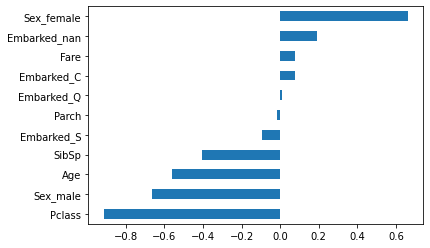

In [21]:
coefficients.sort_values().plot.barh();


# 출력 , 캐글 제출

모델을 테스트에 적용 후 캐글에 제출

In [22]:
X_test = test[features]
X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)

y_pred_test = model.predict(X_test_scaled)


In [23]:
y_pred_test


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [24]:
submission = test[['PassengerId']].copy()
submission['Survived'] = y_pred_test


In [25]:
submission


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [26]:
submission.to_csv('submission_titanic.csv', index=False)
